# 1 Loading

In [1]:
 !apt install --allow-change-held-packages libcudnn8=8.1.0.77-1+cuda11.2

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libcudnn8 is already the newest version (8.1.0.77-1+cuda11.2).
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.


In [2]:
# Check libcudnn8 version
!apt-cache policy libcudnn8

# Install latest version
!apt install --allow-change-held-packages libcudnn8=8.4.1.50-1+cuda11.6

# Export env variables
!export PATH=/usr/local/cuda-11.4/bin${PATH:+:${PATH}}
!export LD_LIBRARY_PATH=/usr/local/cuda-11.4/lib64:$LD_LIBRARY_PATH
!export LD_LIBRARY_PATH=/usr/local/cuda-11.4/include:$LD_LIBRARY_PATH
!export LD_LIBRARY_PATH=$LD_LIBRARY_PATH:/usr/local/cuda/extras/CUPTI/lib64

# Install tensorflow
!pip install tflite-model-maker==0.4.0
!pip uninstall -y tensorflow && pip install -q tensorflow==2.9.1
!pip install pycocotools==2.0.4
!pip install opencv-python-headless==4.6.0.66

libcudnn8:
  Installed: 8.1.0.77-1+cuda11.2
  Candidate: 8.8.1.3-1+cuda12.0
  Version table:
     8.8.1.3-1+cuda12.0 500
        500 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  Packages
     8.8.1.3-1+cuda11.8 500
        500 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  Packages
     8.8.0.121-1+cuda12.0 500
        500 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  Packages
     8.8.0.121-1+cuda11.8 500
        500 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  Packages
     8.7.0.84-1+cuda11.8 500
        500 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  Packages
     8.6.0.163-1+cuda11.8 500
        500 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  Packages
     8.5.0.96-1+cuda11.7 500
        500 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  Packages
     8.4.1.50-1+cuda11.6

In [3]:
# Importing essential modules
import os
import keras
import pandas            as pd
import numpy             as np
import tensorflow        as tf
import matplotlib.pyplot as plt
import torch.utils.data  as data
from numpy                     import take
from keras.models              import Sequential
from keras.layers              import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils    import to_categorical, image_dataset_from_directory
from keras.preprocessing       import image
from keras.preprocessing.image import ImageDataGenerator
from torchvision.datasets      import ImageFolder

In [4]:
## Mount notebook to Google Drive
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

# Changing directory
!pwd
dir = '/content/drive/MyDrive/Capstone_Project_3/data'
os.chdir(dir)

Mounted at /content/drive
/content


In [5]:
!pwd

/content/drive/MyDrive/Capstone_Project_3/data


In [6]:
# Data loading 
train_gen = ImageDataGenerator(rescale=1./255, validation_split=0.3)
    

# Creating training dataset
train_data = train_gen.flow_from_directory(dir, target_size =(224, 224), 
                                          batch_size=32, class_mode='binary',
                                           subset='training')
    
# Creating test dataset
test_data = train_gen.flow_from_directory(dir, target_size=(224, 224),
                                          batch_size=32, class_mode='binary',
                                          subset='validation')

train_dataset = image_dataset_from_directory(dir,
                                             shuffle=True,
                                             batch_size=32,image_size=(224,224))

Found 3888 images belonging to 4 classes.
Found 1666 images belonging to 4 classes.
Found 5554 files belonging to 4 classes.


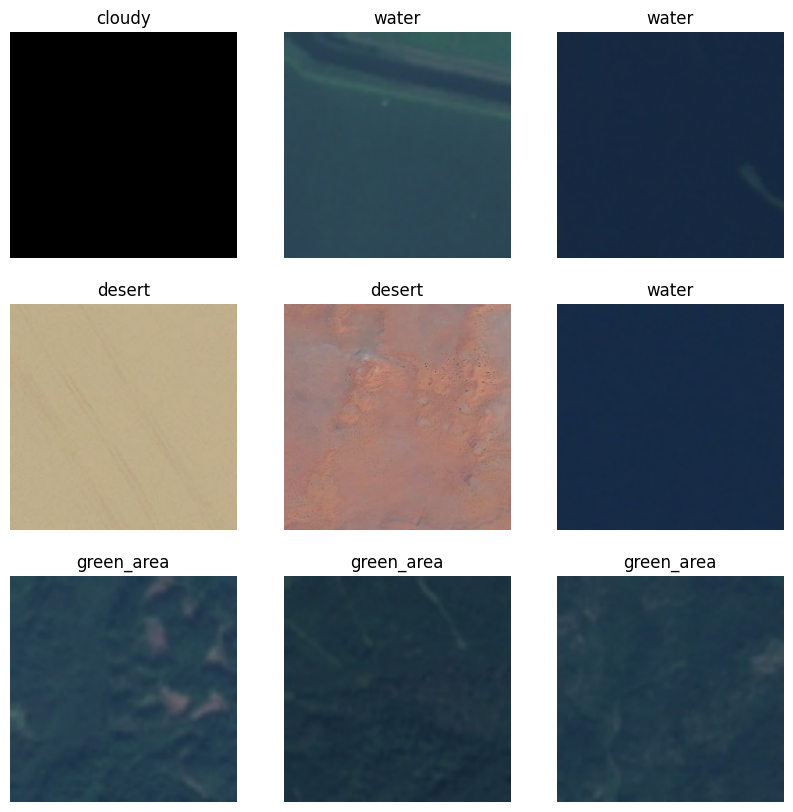

In [7]:
# Deriving class lables
class_names =  train_dataset.class_names

# Printing out 
plt.figure(figsize = (10,10))
for image, label in train_dataset.take(1):
    for i in range(9) :
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(class_names[label[i]])
        plt.axis("off")

# 2 Preprocessing

In [8]:
# Checking dimensions
print(image[0])

# Initalizing model
model = Sequential()

# Creating CNN model
model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(4, activation='softmax'))

tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]], shape=(224, 224, 3), dtype=float32)


In [9]:
# Getting summary of model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense (Dense)               (None, 256)               4

# 3. Modeling 

In [10]:
# Compiling model
model.compile(optimizer='adam',
              loss='SparseCategoricalCrossentropy',
              metrics=['accuracy'])

# Fitting model
history = model.fit(train_data, epochs=50, validation_data=test_data)

Epoch 1/50
122/122 [==============================] - 556s 5s/step - loss: 0.9264 - accuracy: 0.7341 - val_loss: 0.3194 - val_accuracy: 0.8770
Epoch 2/50
122/122 [==============================] - 19s 157ms/step - loss: 0.4008 - accuracy: 0.8259 - val_loss: 0.2983 - val_accuracy: 0.8854
Epoch 3/50
122/122 [==============================] - 18s 150ms/step - loss: 0.3395 - accuracy: 0.8655 - val_loss: 0.4836 - val_accuracy: 0.7497
Epoch 4/50
122/122 [==============================] - 18s 149ms/step - loss: 0.3218 - accuracy: 0.8675 - val_loss: 0.2607 - val_accuracy: 0.8866
Epoch 5/50
122/122 [==============================] - 18s 151ms/step - loss: 0.3293 - accuracy: 0.8627 - val_loss: 0.4432 - val_accuracy: 0.8487
Epoch 6/50
122/122 [==============================] - 19s 155ms/step - loss: 0.3147 - accuracy: 0.8668 - val_loss: 0.3171 - val_accuracy: 0.8529
Epoch 7/50
122/122 [==============================] - 19s 152ms/step - loss: 0.3218 - accuracy: 0.8580 - val_loss: 0.2865 - val_accu

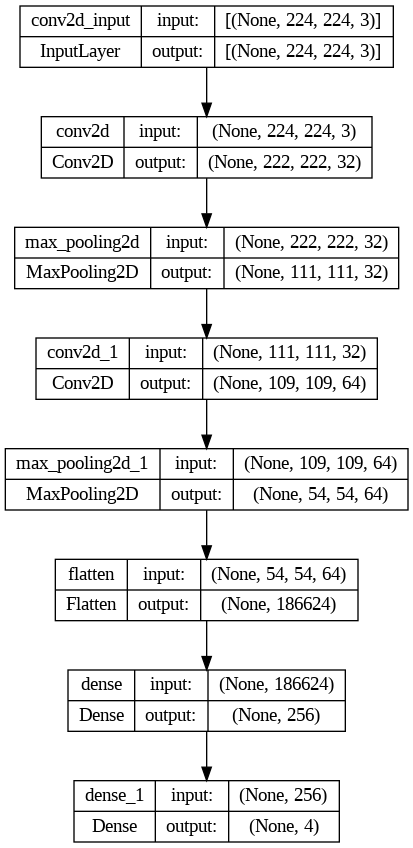

In [11]:
from tensorflow.keras.utils import plot_model
from PIL import Image

# Generating an image of CNN model
plot_model(model, to_file='cnn_model.png', show_shapes=True, show_layer_names=True)
display(Image.open('cnn_model.png'))

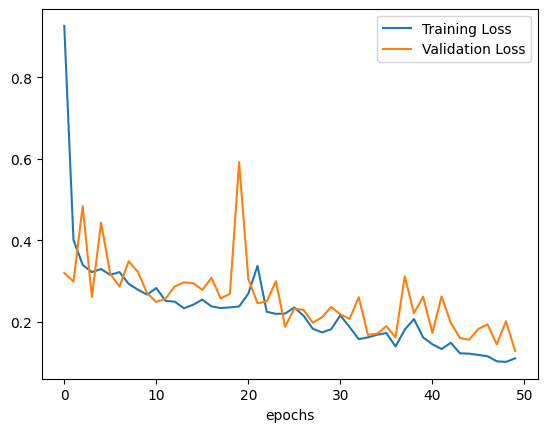

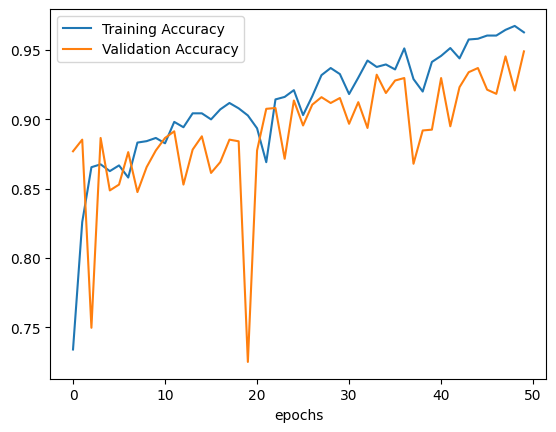

<Figure size 640x480 with 0 Axes>

In [12]:
# Plot the loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('epochs')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# Plot the accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('epochs')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

# 4. Dealing with Overfitting: Data Augmentation and Dropout

In [13]:
from tensorflow.keras import layers

# Data augmentation generates additional
# training data from your existing images by augmenting them
# using random transformations that yield believable-looking images. 
# This will approach will help manage the overfitting of the model.
data_augmentation = keras.Sequential(
  [layers.RandomFlip("horizontal", input_shape=(224, 224, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),])

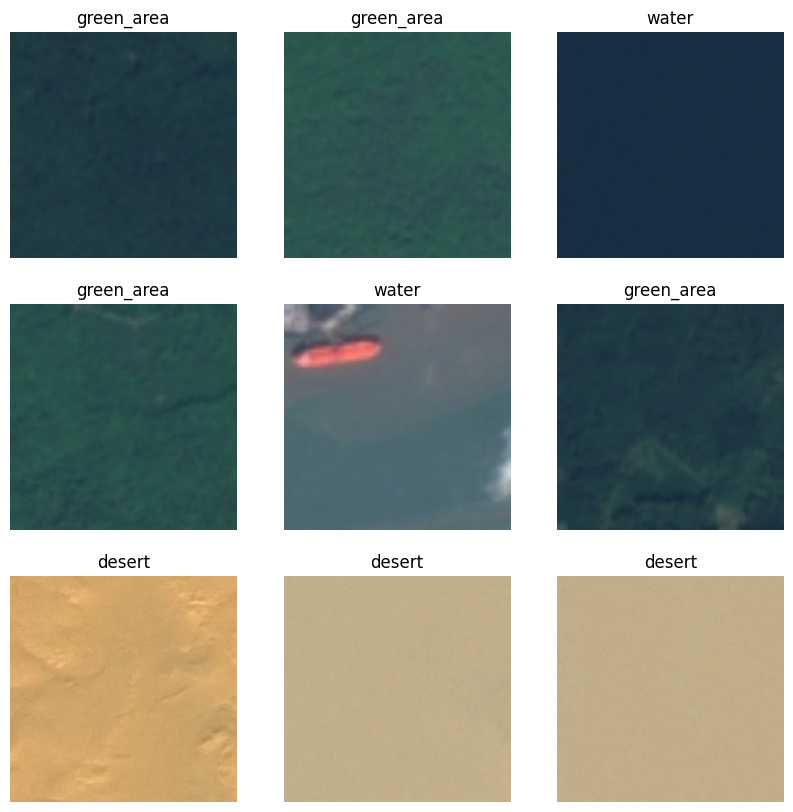

In [14]:
# Visualizing augmented images
plt.figure(figsize = (10,10))
for image, label in train_dataset.take(1):
    for i in range(9) :
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(class_names[label[i]])
        plt.axis("off")

In [15]:
# Creating another CNN model using the augmented images with a 
# dropout layer.
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(4, activation='softmax', name="outputs")])

In [16]:
# Compling new model
model.compile(optimizer='adam',
              loss='SparseCategoricalCrossentropy',
              metrics=['accuracy'])

In [17]:
# Getting summary of new model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 112, 112, 16)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                  

In [18]:
# Fitting model
history = model.fit(train_data, epochs=100, validation_data=test_data)

Epoch 1/100
122/122 [==============================] - 24s 189ms/step - loss: 0.9690 - accuracy: 0.4596 - val_loss: 0.7127 - val_accuracy: 0.5984
Epoch 2/100
122/122 [==============================] - 27s 219ms/step - loss: 0.7106 - accuracy: 0.5746 - val_loss: 0.6905 - val_accuracy: 0.6104
Epoch 3/100
122/122 [==============================] - 22s 180ms/step - loss: 0.7042 - accuracy: 0.5928 - val_loss: 0.7223 - val_accuracy: 0.5762
Epoch 4/100
122/122 [==============================] - 22s 180ms/step - loss: 0.6949 - accuracy: 0.5890 - val_loss: 0.7279 - val_accuracy: 0.5096
Epoch 5/100
122/122 [==============================] - 22s 178ms/step - loss: 0.6636 - accuracy: 0.6124 - val_loss: 0.6889 - val_accuracy: 0.5318
Epoch 6/100
122/122 [==============================] - 23s 184ms/step - loss: 0.6706 - accuracy: 0.6150 - val_loss: 0.7025 - val_accuracy: 0.6327
Epoch 7/100
122/122 [==============================] - 22s 183ms/step - loss: 0.6911 - accuracy: 0.5885 - val_loss: 0.7502 -

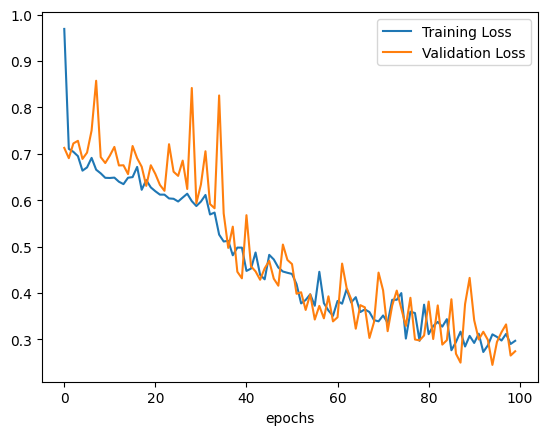

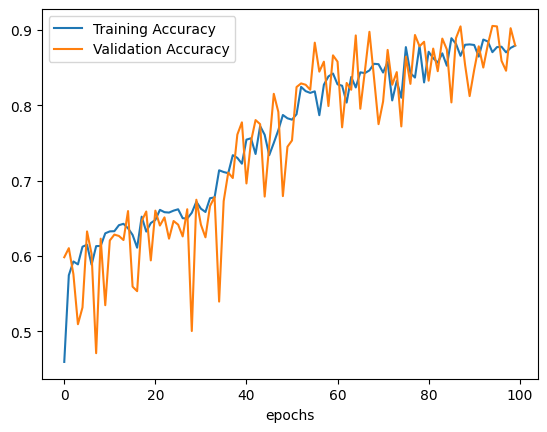

<Figure size 640x480 with 0 Axes>

In [20]:
# Plot the loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('epochs')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# Plot the accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('epochs')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')